# Introduction to Forecasting

Last notebook, we were only fitting models to the existing data. Before we move on to forecasting, lets understand why do we need to fit a model to data?

- Model fitting is a measure of how well a model generalizes to similar data to that on which it was trained.
- Model fitting is the essence of machine learning. If your model doesn’t fit your data correctly, the outcomes it produces will not be accurate enough to be useful for practical decision-making. A properly fitted model has hyperparameters that capture the complex relationships between known variables and the target variable, allowing it to find relevant insights or make accurate predictions.
- Concisely summarize relationships between variables, and make infernential statement about those relationships.


So, the main purpose behind fitting a model is to predict what is next. What's our best guess for next month's value? For the next six months?

We will cover the following topics, which will start with forecasting the models we have learnt and set the stage for more complex models:

- Compare a Holt-Winters and exponential forecasted model to known data(test-train split)
- Understand stationarity, differencing and lagging (setting stage for ARIMA models)

## Forecasting Procedure

    1. Choose a Model
    2. Split data into train and test sets
    3. Fit model on training set
    4. Evaluate model on test set
    5. Re-fit model on entire data set
    6. Forecast for future data



## Forecasting with Exponential and Holt Winters Method

In [1]:
#library imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

In [2]:
#Import the Data
airlines = pd.read_csv('airline_passengers.csv',index_col = 0 , parse_dates=True)
airlines.index.freq = 'MS' #statsmodels requires indexes to have a time stamp
airlines.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


# Train Test Split
The size of the test set is typically about 20% of the total sample, although this value depends on how long the sample is and how far ahead you want to forecast. The test set should ideally be at least as large as the maximum forecast horizon required.

In [4]:
train_data = airlines.iloc[:108] #upto 108 but not including index 108
test_data = airlines.iloc[108:]

## Fitting the Model

In [5]:
# reffering to the last notebook
#fitting the model
fitted_model = sm.tsa.ExponentialSmoothing(train_data['Thousands of Passengers'],trend= 'mul',seasonal='mul',seasonal_periods=12).fit()

## Generating Forecast and Evaluating against the Test Set

In [6]:
test_prediction = fitted_model.forecast(steps=36) #36 periods in the future
# Steps depends on granularity of your data set
# If you had daily data, 36 would represent 36 days and so on.

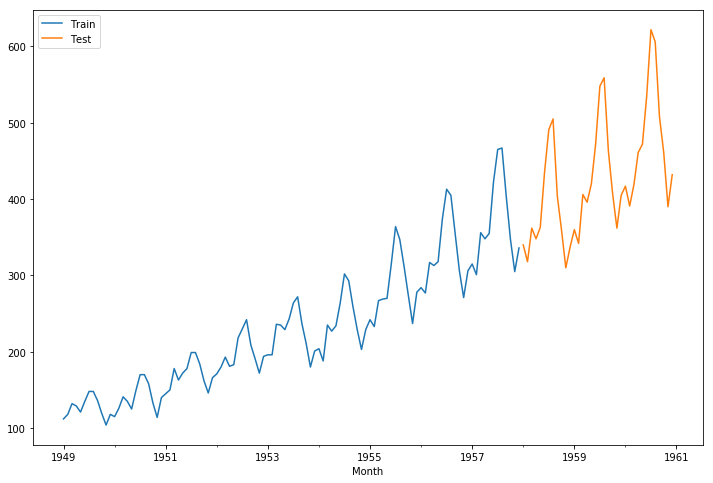

In [7]:
#Plotting the Test and Train Set
train_data['Thousands of Passengers'].plot(legend = True,label = 'Train',figsize = (12,8))
test_data['Thousands of Passengers'].plot(legend = True,label = 'Test',figsize = (12,8))

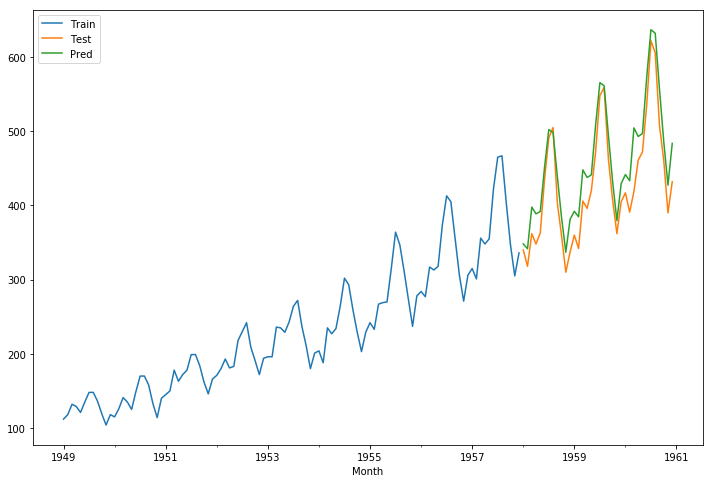

In [8]:
#Plotting the Test and Train Set and the forecast
train_data['Thousands of Passengers'].plot(legend = True,label = 'Train',figsize = (12,8))
test_data['Thousands of Passengers'].plot(legend = True,label = 'Test',figsize = (12,8))
test_prediction.plot(legend = True,label = 'Pred',figsize = (12,8))

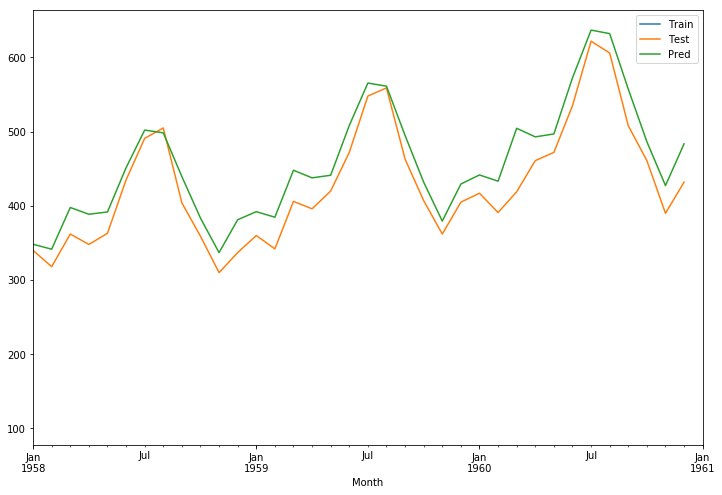

In [9]:
# Good enough
# let's zoom in the forecast portion of it 
train_data['Thousands of Passengers'].plot(legend = True,label = 'Train',figsize = (12,8))
test_data['Thousands of Passengers'].plot(legend = True,label = 'Test',figsize = (12,8))
test_prediction.plot(legend = True,label = 'Pred',figsize = (12,8),xlim = ['1958-1-1','1961-01-01'])

## Evaluation Metrics
After we fit a model on the training data, we forecast to match up to the test data dates.Then we can compare our results for evaluation. Before we dive into the metrics,we have two values:

- y \- Real(actualized value) of test data
- $\hat{y}$ - the predicted value from our forecast

Some of the common metrics:



- **Mean Absolute Error(MAE)** <br>
<p> Mean absolute error is the average of the absolute values of the deviation. This type of error measurement is useful when measuring prediction errors in the same unit as the original series.

<center> $$MAE = \frac{\sum_{i=0}^{n} \left | y_i - \hat{y_i} \right |}{n}$$ </center>

An issue with MAE though, is that simply averaging the residuals won’t alert us if the forecast was really off for a few points.</p>

- **Mean Squared Error (MSE)** <br>
The mean squared error is the average of the square of the forecast error. As the square of the errors are taken, the effect is that larger errors have more weight on the score.

<center> $$MAE = \frac{\sum_{i=0}^{n} (y_i - \hat{y_i})^{2}}{n}$$ </center>

- **Root Mean Square Error (RMSE)** <br>
This is the root of the  mean of the squared errors.

<center> $$RMSE =  \sqrt{\frac{1}{n}\sum_{i=0}^{n} (y_i - \hat{y_i})} $$</center>

Let's start by importing the relevant libraries.


In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [11]:
mean_absolute_error(test_data,test_prediction)

30.24228895401259

In [12]:
mean_squared_error(test_data,test_prediction)

1143.4649378653387

In [13]:
#compare it to monthly average for "Thousand of passengers"
#30.24 error on a monthly is a good model

test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [14]:
#WMAPE calculations
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+0.0000000001))) * 100

In [15]:
mean_absolute_percentage_error(test_data,test_prediction)

22.006689092661922

## Forecasting in Future
Now since we have our parameters and final model selected. Let's move on to forecasting for the complete future.

In [16]:
#fit the model
final_model = sm.tsa.ExponentialSmoothing(airlines['Thousands of Passengers'],trend = 'mul',seasonal='mul',seasonal_periods=12).fit()

In [17]:
#specify the forecast periods
# forecast for 36 months

forecast_prediction = final_model.forecast(steps = 36)

In [18]:
forecast_prediction.head() #series

1961-01-01    450.696219
1961-02-01    424.853976
1961-03-01    475.608791
1961-04-01    504.080734
1961-05-01    517.915698
Freq: MS, dtype: float64

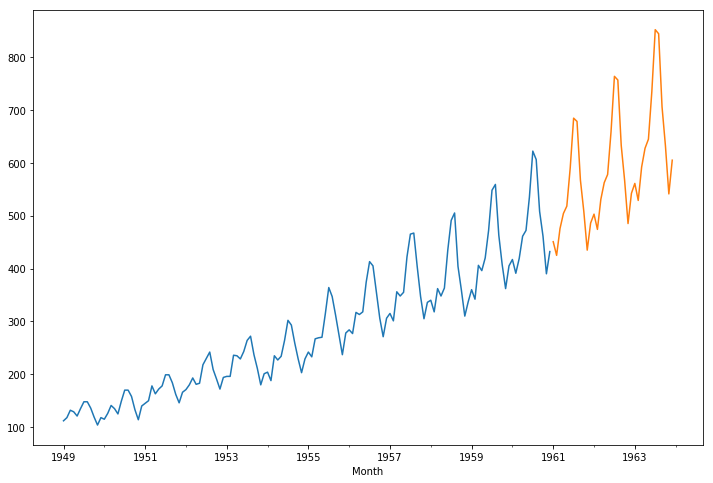

In [19]:
# let's plot both of them

airlines['Thousands of Passengers'].plot(figsize = (12,8))
forecast_prediction.plot()

Before we move on to more complex time series models, let's take a side track to understand few terms which we will encounter commonly in forecasting.

## Stationary Time Series

A stationary time series is one whose properties do not depend on the time at which the series is observed.Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time. 

- Mean($\mu$) is constant
- Standard Deviation($\sigma$) is constant
- No Seasoanlity


In [20]:
df = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


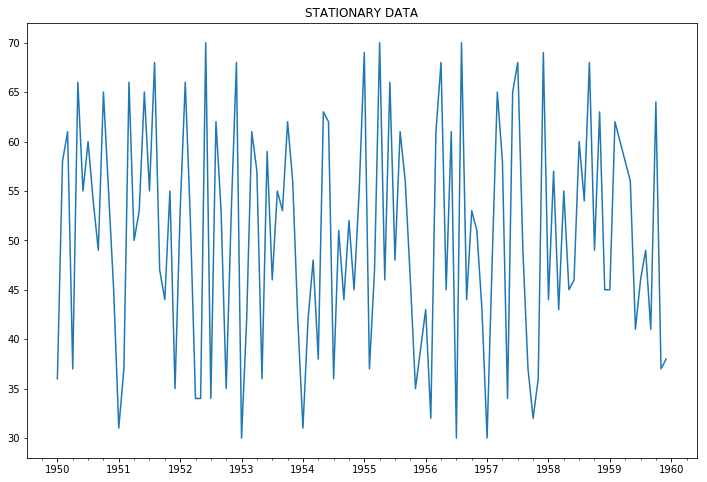

In [21]:
#no trend
#no seasonality
df['a'].plot(figsize = (12,8),title = 'STATIONARY DATA').autoscale(enable = True,axis = 'x')

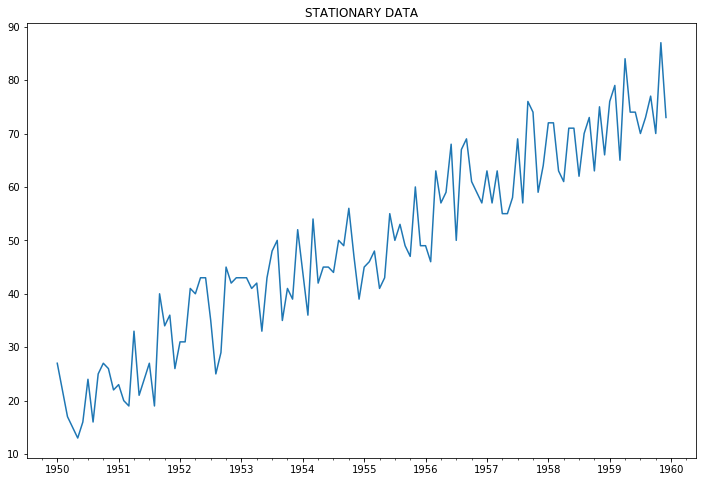

In [22]:
#trend is present
df['b'].plot(figsize = (12,8),title = 'STATIONARY DATA').autoscale(enable = True,axis = 'x')

We are checking visually for now. We have various tests to check stationary data.

## Differencing 
Non-stationary data can be made to look stationary through differencing. A simple differencing method calculates the difference between consecutive points.It is one way to make a non-stationary time series stationary — compute the differences between consecutive observations. This is known as differencing.

We have a function to execute this, but let's start by understanding how it works

### First order Differencing
A simple method called first order differencing calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.

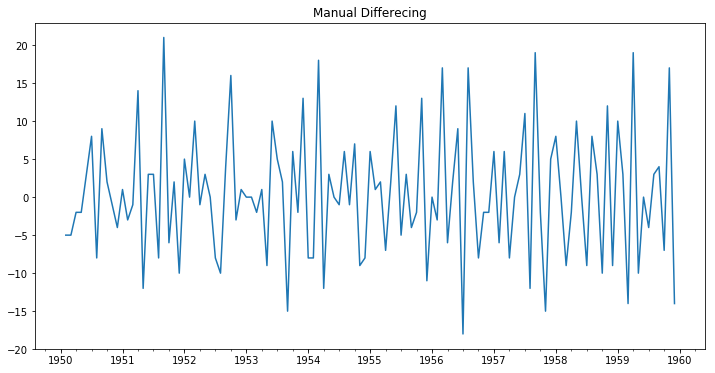

In [23]:
#we are finding the difference between consequtive data points
df['differencing of first order'] = df['b'] - df['b'].shift(1)
df['differencing of first order'].plot(figsize = (12,6),title = 'Manual Differecing').autoscale(enable = True,axis = 'x')

Using the `statsmodel` library, access the statespace object to find the difference

- [sm.tsa.statespace.tools.diff](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.tools.diff.html)

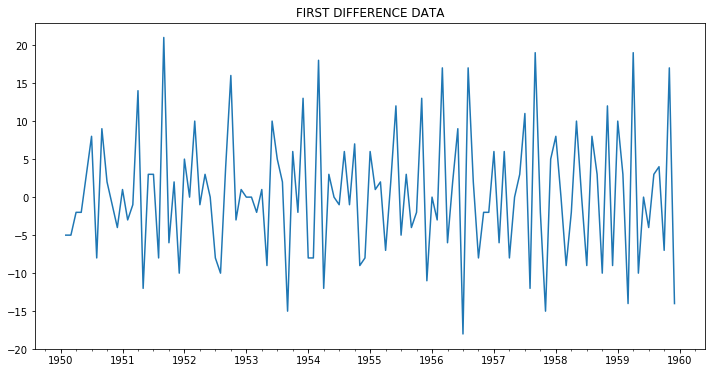

In [24]:
df['differencing of first order_statsmodel'] = sm.tsa.statespace.tools.diff(df['b'])
df['differencing of first order_statsmodel'].plot(figsize = (12,6),title="FIRST DIFFERENCE DATA").autoscale(enable = True,axis = 'x')

### Forecasting on first order differenced data
When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

Let's say that the next five forecasted values after applying some model to <tt> df['differencing of first order'] </tt> are <tt>[7,-2,5,-1,12] </tt>. We need to perform an inverse transformation to obtain values in the scale of the original time series.


In [29]:
# For our example we need to build a forecast series from scratch
# First determine the most recent date in the training set, to know where the forecast set should start

df[['b']].tail(3)

,b
1959-10-01,70
1959-11-01,87
1959-12-01,73


In [34]:
#make a date range index extending to 5 periods into the future
idx = pd.date_range('1960-01-01',periods=5,freq = 'MS')

z = pd.DataFrame([7,-2,5,-1,12],index = idx,columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas .cumsum() function which does the reverse of .diff()

In [39]:
z['forecast']=df['b'].iloc[-1] + z['Fcast'].cumsum()
z

,Fcast,forecast
1960-01-01,7,80
1960-02-01,-2,78
1960-03-01,5,83
1960-04-01,-1,82
1960-05-01,12,94


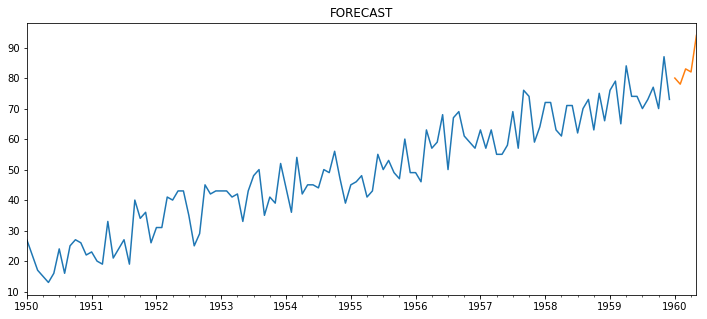

In [40]:
df['b'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)
z['forecast'].plot();

### Second Order Differencing 
Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$


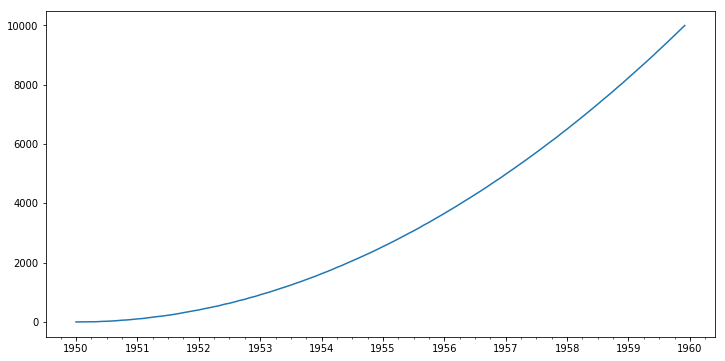

In [43]:
# First we'll look at the first order difference of dataset "c"
df['c'].plot(figsize  = (12,6)) # not linear
df['d1c'] = sm.tsa.statespace.tools.diff(df['c'])

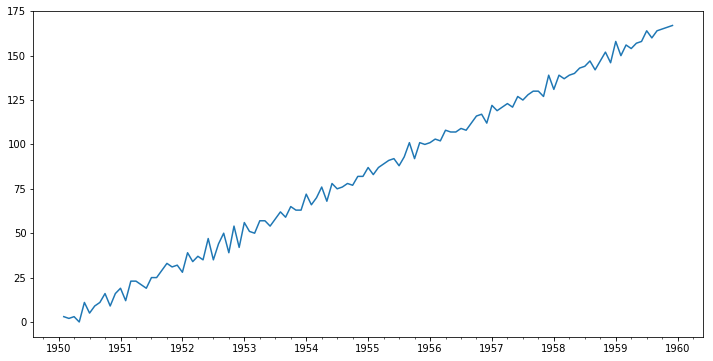

In [44]:
# differencing it once
df['d1c'] = sm.tsa.statespace.tools.diff(df['c'])
df['d1c'].plot(figsize  = (12,6))
# Still not stationary

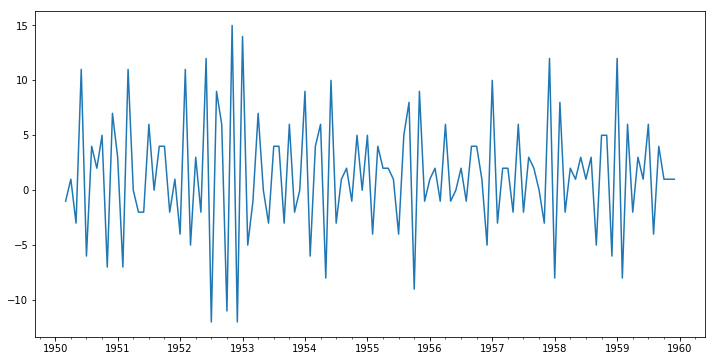

In [45]:
df['d2c'] = sm.tsa.statespace.tools.diff(df['d1c'])
df['d2c'].plot(figsize  = (12,6)) # Stationary 

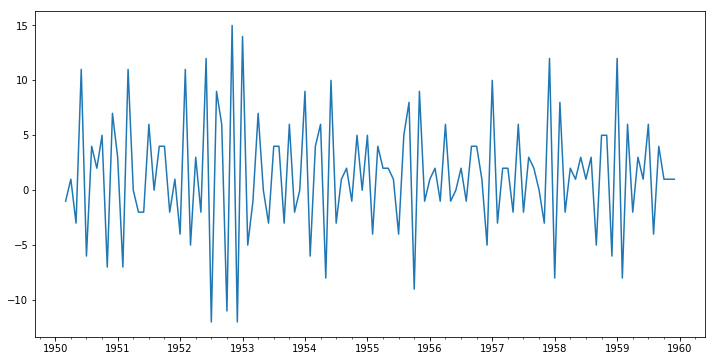

In [46]:
#another way to do it
df['d2c'] = sm.tsa.statespace.tools.diff(df['c'],k_diff=2)
df['d2c'].plot(figsize = (12,6)) #same result

In [48]:
df[['c','d1c','d2c']].head()

,c,d1c,d2c
1950-01-01,0,NaN,NaN
1950-02-01,3,3.0,NaN
1950-03-01,5,2.0,-1.0
1950-04-01,8,3.0,1.0
1950-05-01,8,0.0,-3.0


Now that we have an intiution of differencing, let's look at the formula again:

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$

The last formula is just simple algebra.

### Forecasting on second order differenced data

We will discuss way to genrate forecast on differeced data on the next notebook. For now, let's assume the same prediction value as before and understand how to genreate appropiate forecast. 

To invert the second order transformation and obtain forecasted values for $\hat y_t$ we have to solve the second order equation for $y_t$:

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_t - 2y_{t-1} + y_{t-2} \\
y_t &= y_{t}^{\prime\prime} + 2y_{t-1} - y_{t-2}\end{split}$


Let's say that the next five forecasted values after applying some model to <tt>df['d2c']</tt> are <tt>[7,-2,5,-1,12]</tt>.

In [49]:
#same as first order differencing
idx = pd.date_range('1960-01-01',periods=5,freq = 'MS')

z = pd.DataFrame([7,-2,5,-1,12],index = idx,columns=['Fcast'])
z

,Fcast
1960-01-01,7
1960-02-01,-2
1960-03-01,5
1960-04-01,-1
1960-05-01,12


In [53]:
# Invert the formula above
# 𝑦𝑡=𝑦′′𝑡+2𝑦𝑡−1−𝑦𝑡−2

forecast = list()

# Extract yt-1 and yt-2
yt_2,yt_1 =df['c'].iloc[-2:] 

#easy for loop now

for i in z['Fcast']:
    forecast.append(i + 2*yt_1 - yt_2)
    #update yt_1 & yt_2
    
    yt_1,yt_2 = (i + 2*yt_1 - yt_2) ,yt_1
    

z['forecast'] = forecast
z

,Fcast,forecast
1960-01-01,7,10174
1960-02-01,-2,10346
1960-03-01,5,10523
1960-04-01,-1,10699
1960-05-01,12,10887


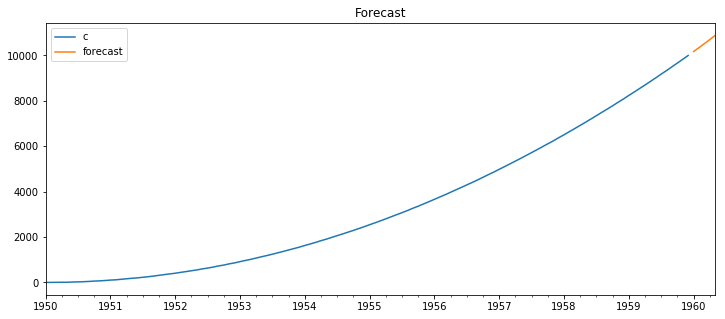

In [57]:
df['c'].plot(figsize = (12,5),title = 'Forecast',legend = True).autoscale(axis = 'x',tight = True)

z['forecast'].plot(legend = True)

#perfect!!!

## Lagging

Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> as we'll see in upcoming sections.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>

<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>

